In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_recipes_old = pd.read_csv('PP_recipes.csv', index_col=0)
data_recipes = pd.read_csv('RAW_recipes.csv', index_col=0)
data_interactions = pd.read_csv('RAW_interactions.csv', index_col=0)

In [3]:
data_recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


In [4]:
data_recipes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231637 entries, arriba   baked winter squash mexican style to cookies by design   sugar shortbread cookies
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              231637 non-null  int64 
 1   minutes         231637 non-null  int64 
 2   contributor_id  231637 non-null  int64 
 3   submitted       231637 non-null  object
 4   tags            231637 non-null  object
 5   nutrition       231637 non-null  object
 6   n_steps         231637 non-null  int64 
 7   steps           231637 non-null  object
 8   description     226658 non-null  object
 9   ingredients     231637 non-null  object
 10  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 21.2+ MB


In [5]:
data_recipes.head(10)

,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
name,,,,,,,,,,,
arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6


In [6]:
data_interactions.describe()

,recipe_id,rating
count,1.132367e+06,1.132367e+06
mean,1.608972e+05,4.411016e+00
std,1.303987e+05,1.264752e+00
min,3.800000e+01,0.000000e+00
25%,5.425700e+04,4.000000e+00
50%,1.205470e+05,5.000000e+00
75%,2.438520e+05,5.000000e+00
max,5.377160e+05,5.000000e+00


In [7]:
data_interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1132367 entries, 38094 to 2001868099
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   recipe_id  1132367 non-null  int64 
 1   date       1132367 non-null  object
 2   rating     1132367 non-null  int64 
 3   review     1132198 non-null  object
dtypes: int64(2), object(2)
memory usage: 43.2+ MB


In [8]:
data_interactions.head()

,recipe_id,date,rating,review
user_id,,,,
38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


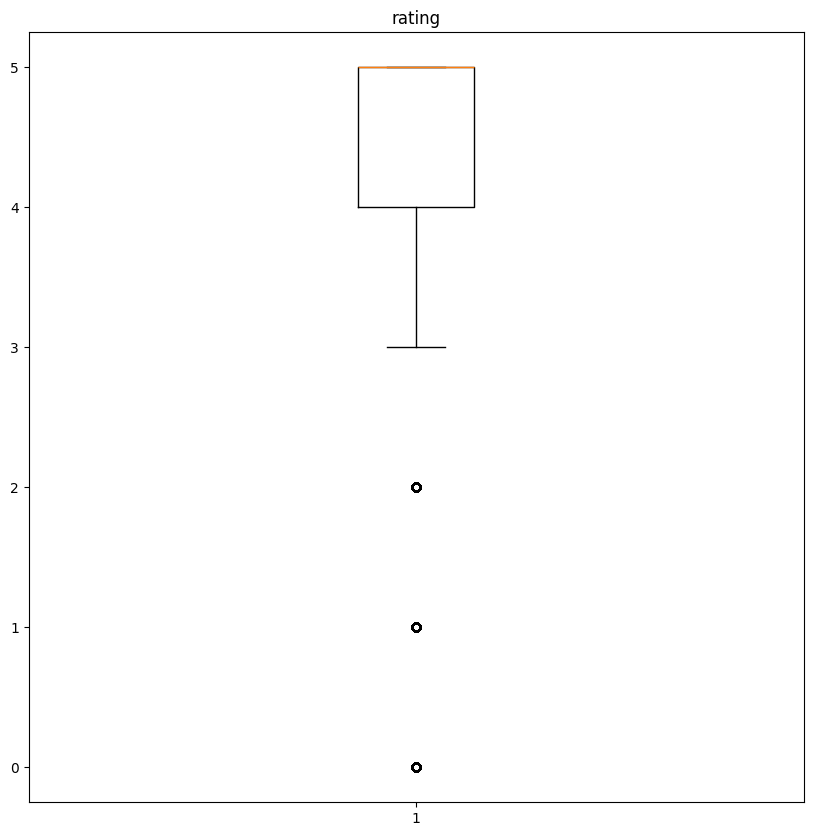

In [9]:
plt.figure(figsize=(10, 10))
plt.boxplot(data_interactions['rating'])
plt.title('rating')
plt.show()

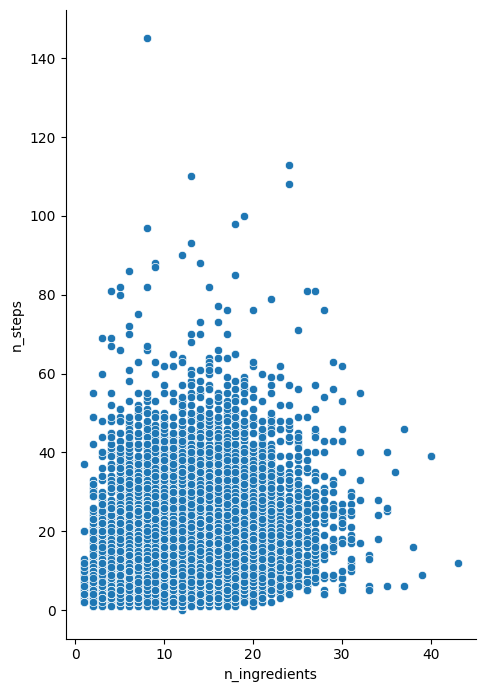

In [10]:
sns.pairplot(data_recipes,x_vars=['n_ingredients'], y_vars='n_steps', height=7, aspect=0.7)

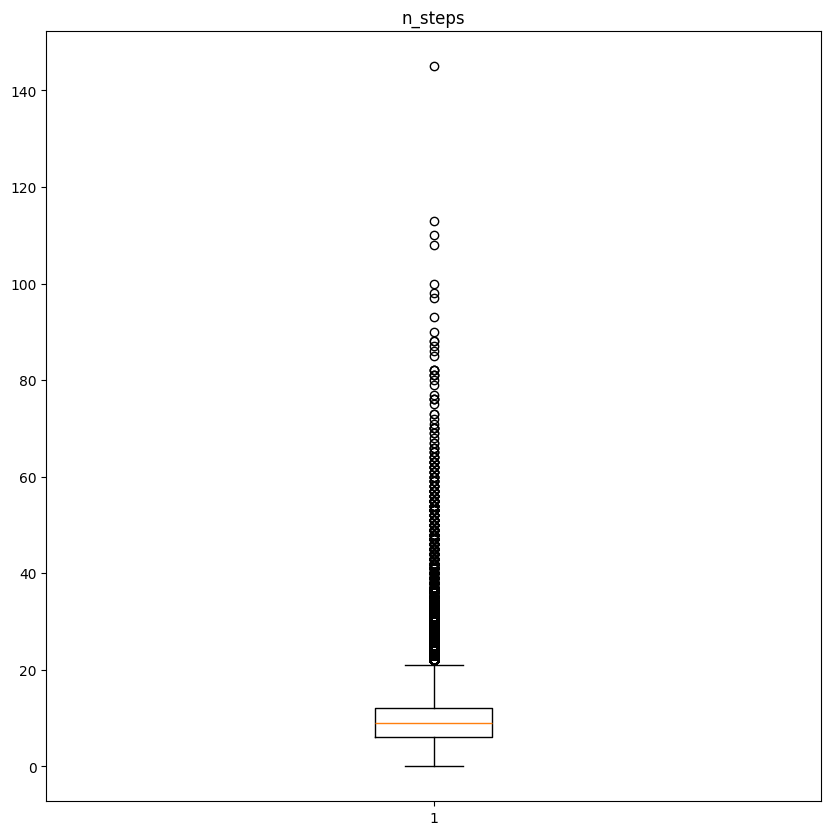

In [11]:
plt.figure(figsize=(10, 10))
plt.boxplot(data_recipes['n_steps'])
plt.title('n_steps')
plt.show()

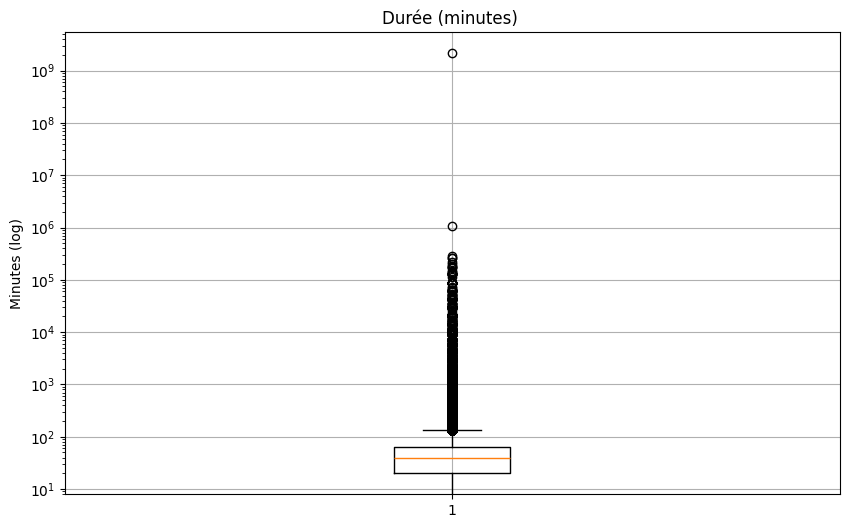

In [12]:
plt.figure(figsize=(10, 6))
plt.boxplot(data_recipes['minutes'])

# Appliquer une échelle logarithmique à l’axe **y**
plt.yscale('log')

plt.title('Durée (minutes) ')
plt.ylabel('Minutes (log)')
plt.grid(True)
plt.show()

In [18]:
data_recipes.rename(columns={'id': 'id_recipes'}, inplace=True)

In [19]:
data_recipes

,id_recipes,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
name,,,,,,,,,,,
arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...
zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8


In [22]:
data_interactions.rename(columns={'recipe_id': 'id_recipes'}, inplace=True)
data_interactions

,id_recipes,date,rating,review
user_id,,,,
38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...
116593,72730,2003-12-09,0,Another approach is to start making sauce with...
583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...


In [23]:
data_fusion=pd.merge(data_recipes,data_interactions,on='id_recipes')

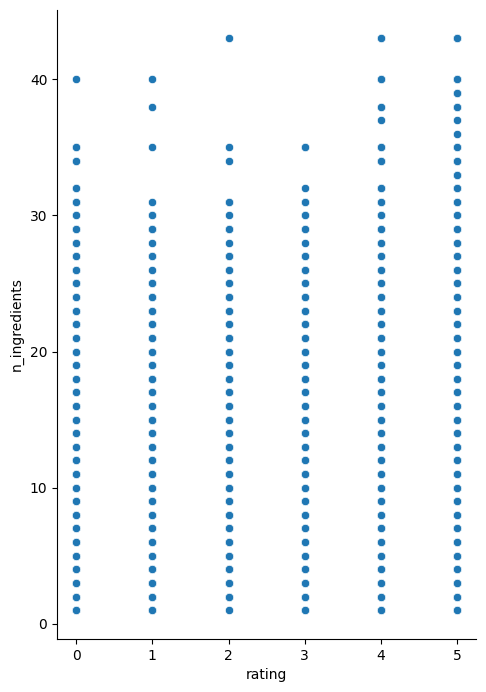

In [27]:
sns.pairplot(data_fusion,x_vars=['rating'], y_vars='n_ingredients', height=7, aspect=0.7)

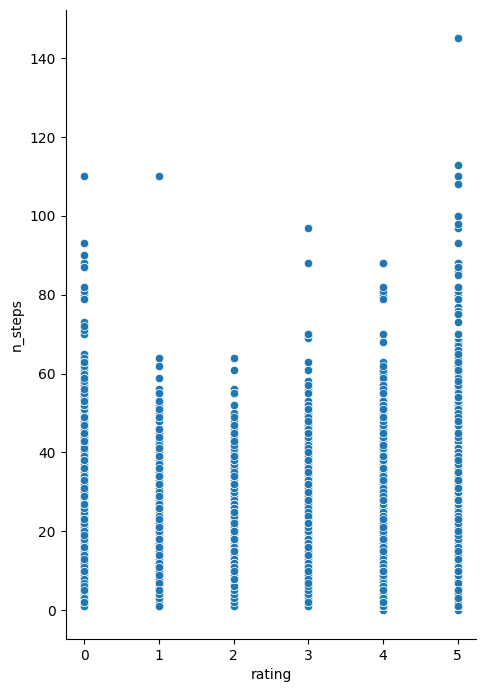

In [26]:
sns.pairplot(data_fusion,x_vars=['rating'], y_vars='n_steps', height=7, aspect=0.7)